<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Mahdi Shafiei
### Student Number : 99109409
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [73]:
#TODO
heart_disease_pdf = pd.read_csv("heart_disease.csv")
X = heart_disease_pdf.drop(['target'], axis=1)
y = heart_disease_pdf[['target']]
y = y * 2 - 1
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.70, random_state=42)
y_train = y_train.reshape((len(y_train), ))
y_test = y_test.reshape((len(y_test), ))

### Adaboost Algorithm Implementation (40 points)

In [74]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    return (sum(w * (np.not_equal(y, y_pred)).astype(int)))/sum(w)

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1 - error) / error)
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return np.multiply(w, np.exp(np.multiply(alpha, (np.not_equal(y, y_pred)).astype(int))))
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                w = np.ones(len(y)) * 1 / len(y)
                 
            else:
                #TODO
                w = update_weights(w, alpha_m, y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            G_m = DecisionTreeClassifier(max_depth = 1)
            G_m.fit(X, y, sample_weight = w)
            y_pred = G_m.predict(X)
            self.G_M.append(G_m)

            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error_m = calculate_error(y, y_pred, w)
            self.training_errors.append(error_m)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha_m = calculate_alpha(error_m)
            self.alphas.append(alpha_m)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [101]:
#TODO : Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M = 1000)

#TODO : Predict on test data
y_pred = ab.predict(X_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print("Accurcay: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:   ", metrics.recall_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, y_pred))

Accurcay:  0.8927576601671309
Precision: 0.883289124668435
Recall:    0.9098360655737705
F1 score:  0.8963660834454913


In [102]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 96)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print("Accurcay: ", metrics.accuracy_score(y_test, y_pred_clf))
print("Precision:", metrics.precision_score(y_test, y_pred_clf))
print("Recall:   ", metrics.recall_score(y_test, y_pred_clf))
print("F1 score: ", metrics.f1_score(y_test, y_pred_clf))

Accurcay:  0.8565459610027855
Precision: 0.8602739726027397
Recall:    0.8579234972677595
F1 score:  0.8590971272229821


### Early Stopping (15 points)

In [103]:
#TODO : Calculate validation error for different number of estimators 
estimator_numbers = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
f1_scores = []
for number in estimator_numbers:
  ab_num = AdaBoost()
  ab_num.fit(X_train, y_train, M=number)
  y_pred_num = ab_num.predict(X_test)
  f1_scores.append(metrics.f1_score(y_test, y_pred_num))

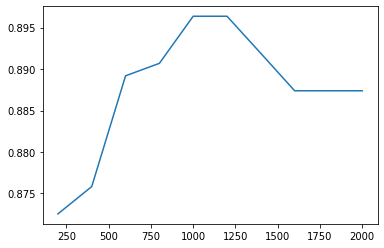

In [104]:
#TODO : Plot validation error versus number of estimators figure.
plt.plot(estimator_numbers, f1_scores)
plt.show()

In [105]:
#TODO : Print the best number for estimators and minimum value for validation error.
print("Best number of estimators:", estimator_numbers[np.argmax(f1_scores)])

Best number of estimators: 1000


### Weighted Error (10 points)

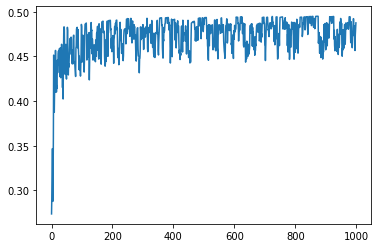

In [107]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
plt.plot(range(1000), ab.training_errors)
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

Decision Tress tend to overfit the training data, which is also true for the stumps used in AdaBoost. So each classifier, overfits on the previous data, so at each step, error increases.